In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('owid-energy-data.csv')
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Afghanistan,1900,AFG,4832414.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,AFG,4879685.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,AFG,4935122.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,AFG,4998861.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,AFG,5063419.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21890 entries, 0 to 21889
Columns: 129 entries, country to wind_share_energy
dtypes: float64(126), int64(1), object(2)
memory usage: 21.5+ MB


In [5]:
continents = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']
df1 = df[df['country'].isin(continents)]

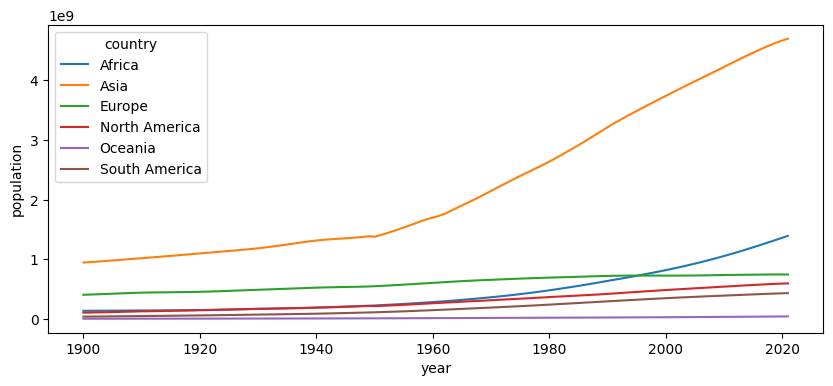

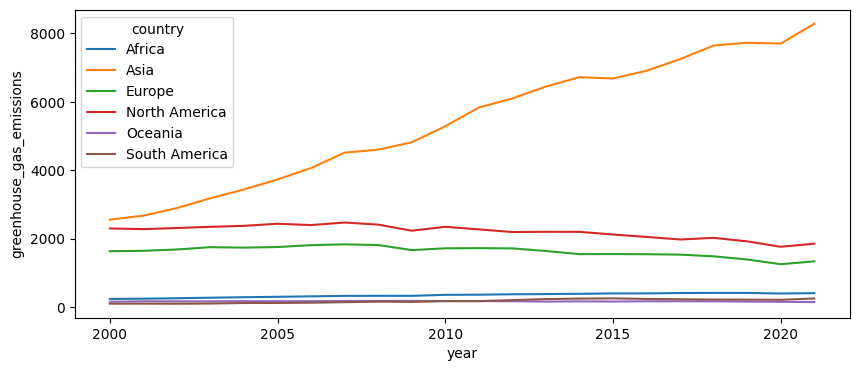

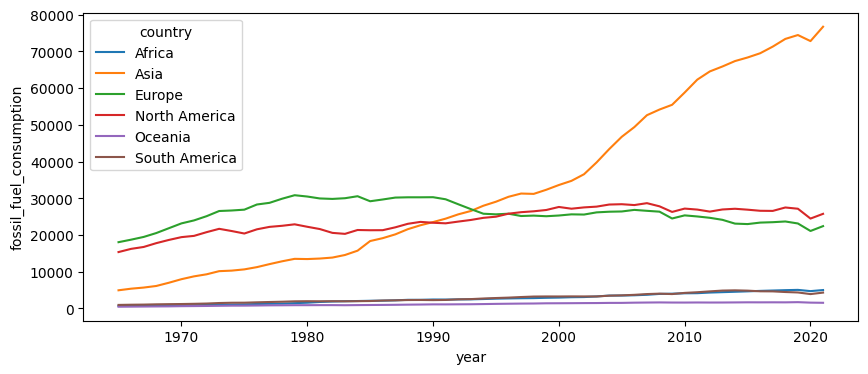

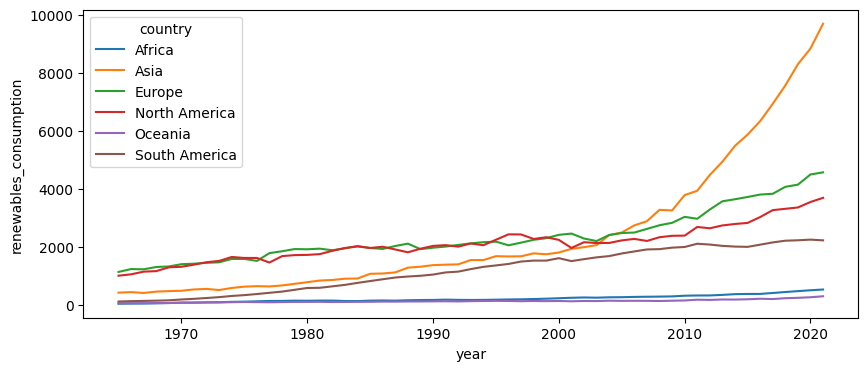

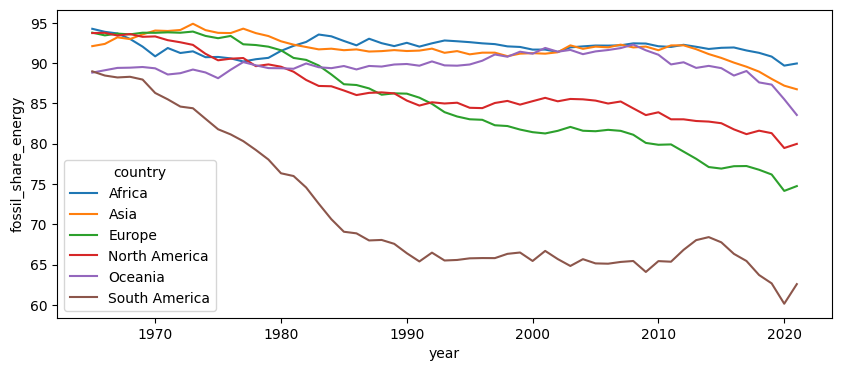

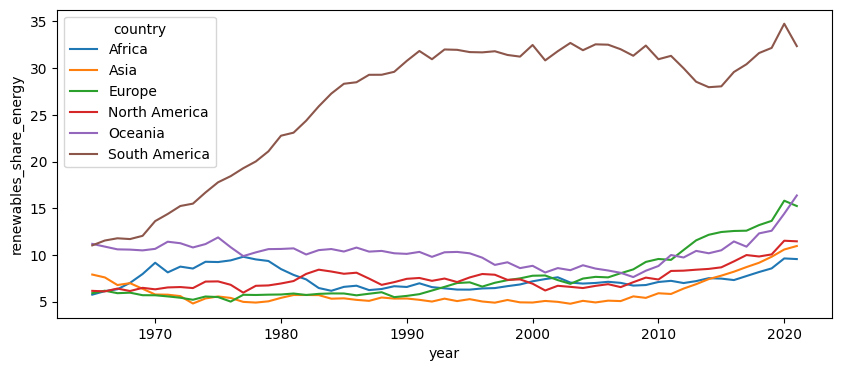

In [6]:
continent_plotting_metrics = ['population', 'greenhouse_gas_emissions', 'fossil_fuel_consumption', 'renewables_consumption', 'fossil_share_energy', 'renewables_share_energy']

for metric in continent_plotting_metrics:
    figure = plt.figure(figsize=(10,4))
    sb.lineplot(data=df1, x = 'year', y = metric, hue = 'country')

We take reference to renewables_share_energy and look at 1965 onwards for our remaining data.

This is because a large proportion of data before 1965 is missing, making the columns unusable. A visual inspection in the excel file will verify this.

In [7]:
df2 = df1[(df1['country'] == 'South America') & (df1['year'] > 1964)]
df2.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
17778,South America,1965,NaN,170706949.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17779,South America,1966,NaN,175135459.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17780,South America,1967,NaN,179569020.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17781,South America,1968,NaN,184011029.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17782,South America,1969,NaN,188469386.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**1st round of column filtering:** Handling columns with null values

**Justification:** Remove columns with significantly large null values and extrapolating columns with little null values

We drop values that have significantly high number of null values. Since the number of rows is **57**, we are more strict on the number of values to tolerate and set it to **5** as we need to have sufficient data to make extrapolated values.

In [8]:
# initialise dataframe with all columns as index, and number of null values in dataframe's columns
df_col_null = pd.DataFrame(df2.isnull().sum().sort_values(ascending=False))

# narrow down the clean columns
df_col_clean = df_col_null[df_col_null.loc[:, 0] < 6]
len(df_col_clean)

70

In [9]:
# find the year in which the single null value exists
for col in list(df_col_clean[df_col_clean[0] == 1].index):
    year = []
    col_year = df2['year'][df2['nuclear_cons_change_twh'].isnull()].iloc[0]
    if col_year not in year:
        year.append(col_year)
print(year)

[1965]


We see that the remaining columns are all missing 1 null value and a quick check reveals that they all happen in 1965. As it is merely one row, we drop 1965's data as well

In [10]:
df2_clean = df2[df2['year'] > 1965].loc[:, df_col_clean.index]
df2_clean.index = range(1966, 1966 + len(df2_clean))
df2_clean = df2_clean.drop('country', axis=1)

With the cleaned data, we use feature importance to determine which feature can best complement renewables_share_energy.

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# split the data into training and testing sets - 80% train, 20% test (i.e. 45 for train, 11 for test) - preserve chronological order of data
train = df2_clean.iloc[:46]
test = df2_clean.iloc[46:]

# define features and target variable
features = list(df2_clean.columns.drop('renewables_share_energy'))
target = 'renewables_share_energy'

# train a random forest model
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(train[features], train[target])

# evaluate the model on the testing set
mse = mean_squared_error(test[target], model.predict(test[features]))

# print the mean squared error
print(f"MSE: {mse}")
print()

# identify important features
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(len(features)):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

MSE: 3.4519153573714156

1. oil_share_energy (0.124535)
2. fossil_share_energy (0.117640)
3. other_renewables_share_energy (0.055702)
4. other_renewable_electricity (0.053567)
5. gas_share_energy (0.051006)
6. gas_energy_per_capita (0.043825)
7. hydro_consumption (0.041517)
8. nuclear_energy_per_capita (0.036230)
9. gas_prod_per_capita (0.032353)
10. hydro_electricity (0.030355)
11. hydro_share_energy (0.029717)
12. other_renewables_energy_per_capita (0.028726)
13. gas_consumption (0.028040)
14. renewables_consumption (0.027244)
15. primary_energy_consumption (0.026988)
16. low_carbon_share_energy (0.022172)
17. nuclear_elec_per_capita (0.020555)
18. coal_consumption (0.020133)
19. gas_production (0.019526)
20. other_renewables_elec_per_capita (0.019084)
21. other_renewable_consumption (0.018687)
22. year (0.018206)
23. fossil_fuel_consumption (0.013475)
24. low_carbon_elec_per_capita (0.012229)
25. renewables_energy_per_capita (0.011641)
26. population (0.011616)
27. hydro_energy_per_

We compare this with the GradientBoosting model with similar parameters and to take the best of both worlds, we select the columns with high importance that are identified by one or both models.

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

# split the data into training and testing sets - 80% train, 20% test (i.e. 45 for train, 11 for test) - preserve chronological order of data
train = df2_clean.iloc[:46]
test = df2_clean.iloc[46:]

# train a gradient boosting model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(train[features], train[target])

# evaluate the model on the testing set
mse = mean_squared_error(test[target], model.predict(test[features]))

# print the mean squared error
print(f"MSE: {mse}")
print()

# identify important features
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(len(features)):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

MSE: 2.7890153935741195

1. fossil_share_energy (0.223658)
2. other_renewable_electricity (0.141001)
3. gas_production (0.137626)
4. hydro_share_energy (0.093212)
5. hydro_energy_per_capita (0.072085)
6. hydro_elec_per_capita (0.059162)
7. other_renewables_share_energy (0.050690)
8. other_renewables_elec_per_capita (0.036559)
9. gas_share_energy (0.032092)
10. low_carbon_share_energy (0.022671)
11. renewables_consumption (0.019851)
12. oil_prod_per_capita (0.018114)
13. oil_share_energy (0.014687)
14. nuclear_electricity (0.012208)
15. nuclear_consumption (0.010048)
16. hydro_electricity (0.010040)
17. low_carbon_elec_per_capita (0.007422)
18. gas_prod_per_capita (0.006272)
19. low_carbon_energy_per_capita (0.005429)
20. hydro_cons_change_twh (0.003722)
21. primary_energy_consumption (0.003684)
22. oil_production (0.003153)
23. fossil_fuel_consumption (0.002191)
24. coal_consumption (0.001581)
25. low_carbon_consumption (0.001145)
26. energy_per_capita (0.001114)
27. renewables_cons_ch

For now, we will use the rankings selected by GradientBoosting. This is because it works better with fewer training samples as it helps to generalise data more by building decision trees in a sequential manner, where each new tree attempts to correct the attempts made by previous trees. RandomForest on the other hand may be too deep and specific to the training set, leading to overfitting.

Thus, the 5 selected columns are: **'other_renewable_electricity', 'gas_production', 'hydro_energy_per_capita', 'renewables_consumption', 'oil_prod_per_capita'.**

Note that while hydro_elec_per_capita is ranked 4th excluding 'share_energy' columns, it is a duplicate of hydro_energy_per_capita and thus we leave it out.

## Machine Learning - South America's Linear Regression / ARIMA / Exponential Smoothing Model

In [13]:
sa_metrics = ['other_renewable_electricity', 'gas_production', 'hydro_energy_per_capita', 'renewables_consumption', 'oil_prod_per_capita']

sa_df = df2_clean[['renewables_share_energy'] + sa_metrics]

### Linear Regression Model

Mean Squared Error: 14.55570151465493
R-squared: 0.6946607418909935


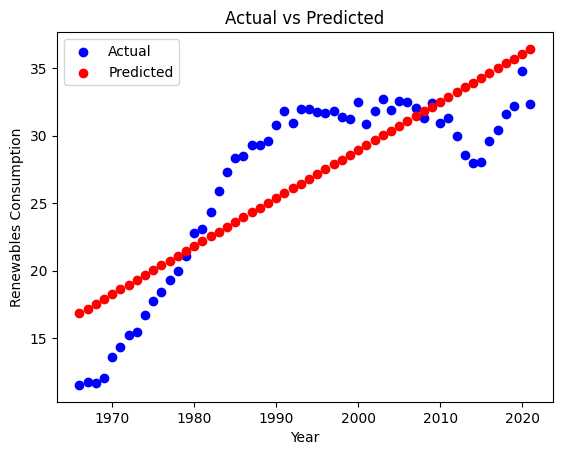

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# intialise x and y values
x = pd.DataFrame(sa_df.index)
y = sa_df['renewables_share_energy']

# initialize the linear regression model
linreg = LinearRegression()

# fit the model on the training data
linreg.fit(x, y)

# make predictions on the test data
y_pred = linreg.predict(x)

# plot scatter plot and predicted linear graph
plt.scatter(x, y, color='blue', label='Actual')
plt.scatter(x, y_pred, color='red', label='Predicted')

# add labels, title and legend
plt.xlabel('Year')
plt.ylabel('Renewables Consumption')
plt.title('Actual vs Predicted')
plt.legend()

# calculate mean squared error
mse = mean_squared_error(y, y_pred)
print('Mean Squared Error:', mse)

# calculate R-squared
r2 = r2_score(y, y_pred)
print('R-squared:', r2)

We use the trained model to predict future values up to 2050.

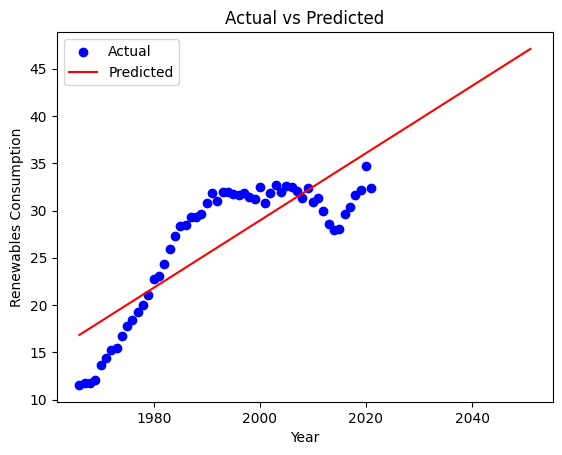

In [15]:
x_fc = np.arange(1966, 2052).reshape(-1, 1)
y_fc = linreg.predict(x_fc)

# plot actual data and predicted data
plt.scatter(x, y, color='blue', label='Actual')
plt.plot(x_fc, y_fc, color='red', label='Predicted')

# add labels and title
plt.xlabel('Year')
plt.ylabel('Renewables Consumption')
plt.title('Actual vs Predicted')

# add legend
plt.legend()

We definitely cannot use Linear Regression to forecast the data to 2050 as the trend is non-linear. However, we still note that it predicts that in 2050, South America will have around 47% of energy derived from renewables.

Hence, we move on to a new model called **Exponential Smoothing**.

### Exponential Smoothing (Additive & Multiplicative)

In [36]:
from statsmodels.tsa.api import ExponentialSmoothing

# initialise relevant data for predictions
expsmooth_df = pd.DataFrame(sa_df['renewables_share_energy'])

# grid search for alpha and beta (additive)
best_score, best_params = float("inf"), None
for alpha in np.arange(0, 1.1, 0.1):
    for beta in np.arange(0, 1.1, 0.1):
        model = ExponentialSmoothing(expsmooth_df, trend='add', damped=True, initialization_method='estimated')
        model_fit = model.fit(smoothing_level=alpha, smoothing_slope=beta)
        yhat = model_fit.forecast(steps=len(expsmooth_df))
        mse = mean_squared_error(expsmooth_df, yhat)
        if mse < best_score:
            best_score, best_params = mse, (alpha, beta)

print('Best MSE (Additive): %.3f' % best_score)
print('Best Parameters (Additive): alpha=%.1f, beta=%.1f' % (best_params[0], best_params[1]))
print()

# grid search for alpha and beta (multiplicative)
best_score_m, best_params_m = float("inf"), None
for alpha in np.arange(0, 1.1, 0.1):
    for beta in np.arange(0, 1.1, 0.1):
        model = ExponentialSmoothing(expsmooth_df, trend='mul', damped=True, initialization_method='estimated')
        model_fit = model.fit(smoothing_level=alpha, smoothing_slope=beta)
        yhat = model_fit.forecast(steps=len(expsmooth_df))
        mse = mean_squared_error(expsmooth_df, yhat)
        if mse < best_score_m:
            best_score_m, best_params_m = mse, (alpha, beta)

print('Best MSE (Multiplicative): %.3f' % best_score_m)
print('Best Parameters (Multiplicative): alpha=%.1f, beta=%.1f' % (best_params_m[0], best_params_m[1]))

Best MSE (Additive): 58.661
Best Parameters (Additive): alpha=1.0, beta=0.7

Best MSE (Multiplicative): 58.281
Best Parameters (Multiplicative): alpha=1.0, beta=0.8


#### Additive Exponential Smoothing Curve

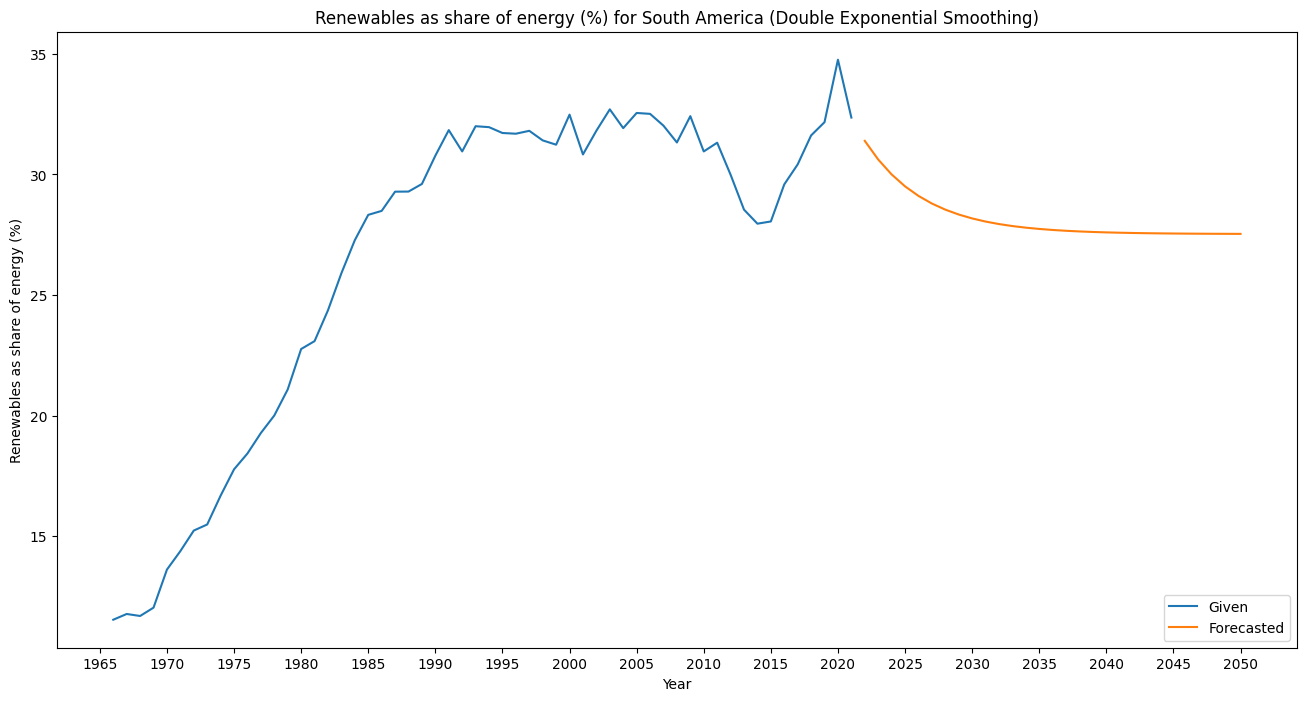

In [37]:
# initialise prediction range
start_year = 2022
end_year = 2050
forecast_index = pd.Series(list(np.arange(start_year,end_year+1)))

# make prediction using the best parameters
model_add = ExponentialSmoothing(expsmooth_df, trend='add', damped=True, initialization_method='estimated')
model_add_fit = model_add.fit(smoothing_level=best_params[0], smoothing_slope=best_params[1])

# make forecasting and add to new dataframe
y_add = model_add_fit.forecast(steps=len(forecast_index))
y_add_df = pd.DataFrame(y_add)
y_add_df.rename({0:'forecast_renewables'}, axis=1, inplace=True)
y_add_df.set_index(forecast_index, inplace=True)

# plot past data with future data
expsmooth_add = pd.concat([expsmooth_df, y_add_df])

fig = plt.figure(figsize=(16,8))
plt.plot(expsmooth_add['renewables_share_energy'], label='Given')
plt.plot(expsmooth_add['forecast_renewables'], label = 'Forecasted')
plt.title('Renewables as share of energy (%) for South America (Double Exponential Smoothing)')
plt.xlabel('Year')
plt.ylabel('Renewables as share of energy (%)')
plt.xticks(np.arange(min(expsmooth_add.index) - 1, max(expsmooth_add.index)+1, 5))
plt.legend(loc='lower right', );

#### Multiplicative Exponential Smoothing Curve

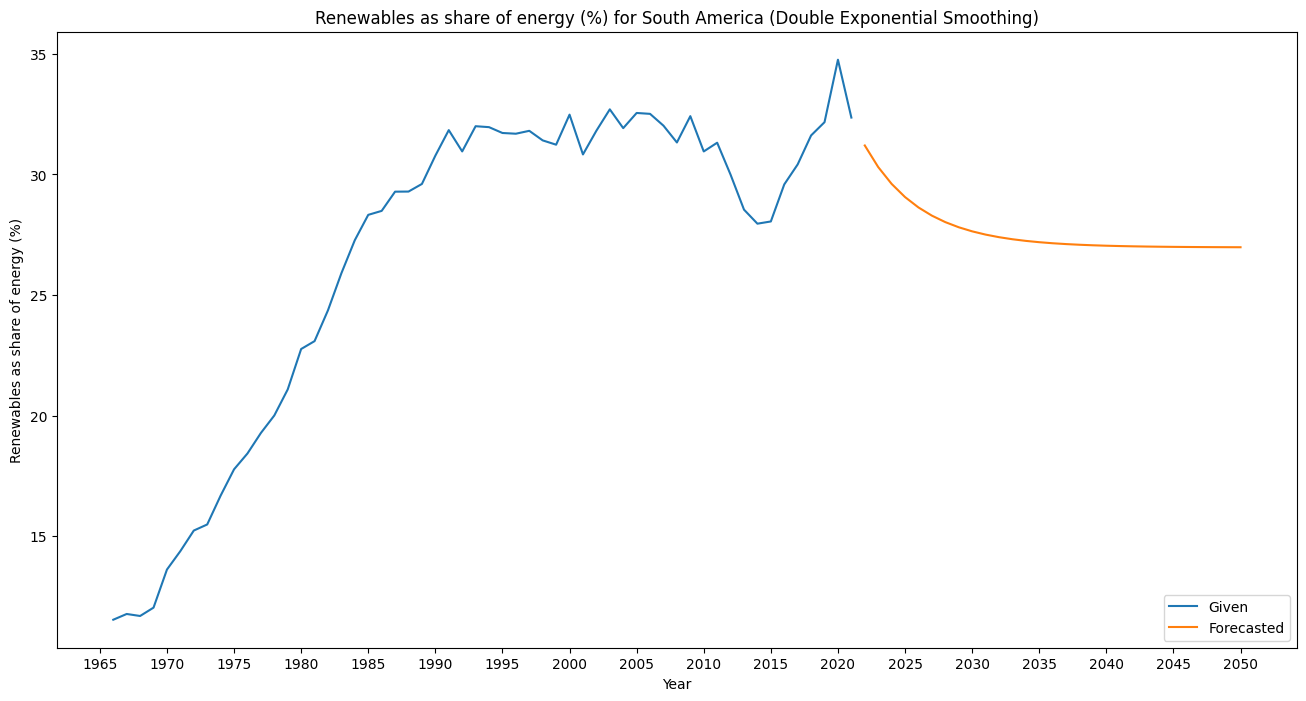

In [38]:
# make prediction using the best parameters
model_mul = ExponentialSmoothing(expsmooth_df, trend='mul', damped=True, initialization_method='estimated')
model_mul_fit = model_mul.fit(smoothing_level=best_params_m[0], smoothing_slope=best_params_m[1])

# make forecasting and add to new dataframe
y_mul = model_mul_fit.forecast(steps=len(forecast_index))
y_mul_df = pd.DataFrame(y_mul)
y_mul_df.rename({0:'forecast_renewables'}, axis=1, inplace=True)
y_mul_df.set_index(forecast_index, inplace=True)

# plot past data with future data
expsmooth_mul = pd.concat([expsmooth_df, y_mul_df])

fig = plt.figure(figsize=(16,8))
plt.plot(expsmooth_mul['renewables_share_energy'], label='Given')
plt.plot(expsmooth_mul['forecast_renewables'], label = 'Forecasted')
plt.title('Renewables as share of energy (%) for South America (Double Exponential Smoothing)')
plt.xlabel('Year')
plt.ylabel('Renewables as share of energy (%)')
plt.xticks(np.arange(min(expsmooth_mul.index) - 1, max(expsmooth_mul.index)+1, 5))
plt.legend(loc='lower right', );

Grid searching for the best alpha and beta via MSE is not the best way to find the ideal parameters. Hence, based on the visualisation, we deduce the following:

**Alpha can be set to a higher value between 0.8 and 1** as we want to take into account the jump from 2016 onwards (likely attributed to increased investments in renewables in the energy)

**Beta can be set to a lower value between 0.1 to 0.3** as we still want to capture the overall trend from 1965 and dampen the plateau between 1990 to 2010.

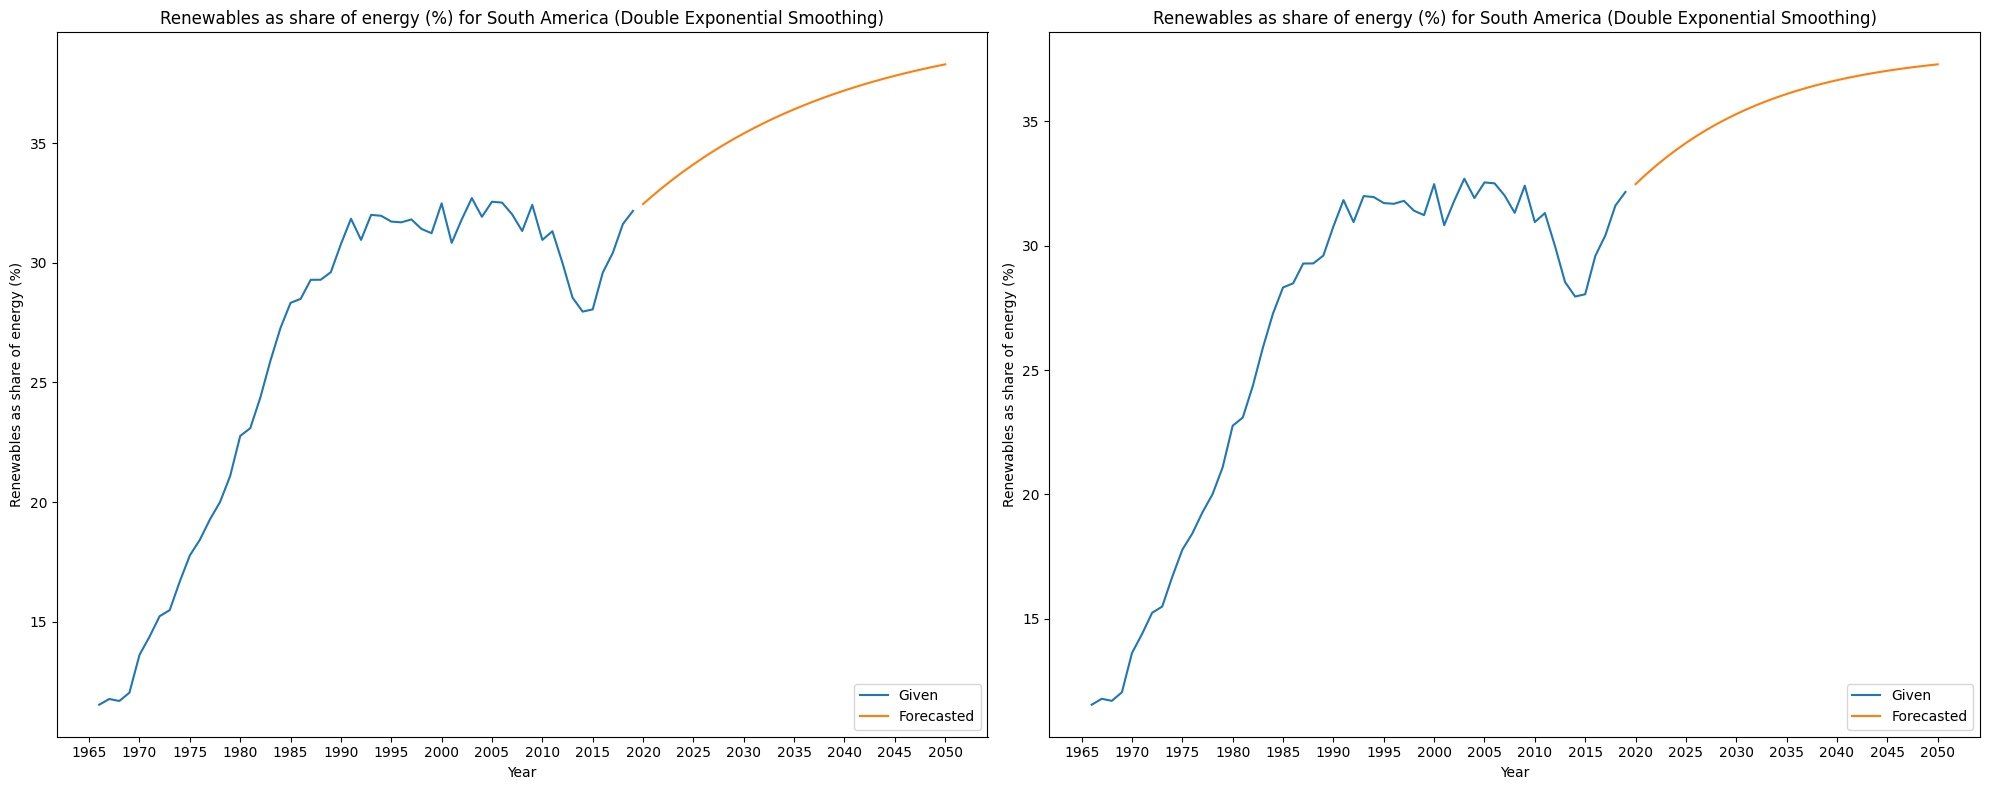

In [58]:
# set alpha and beta parameters
alpha = 0.8
beta = 0.2

# additive exponential smoothing
model_add = ExponentialSmoothing(expsmooth_df, trend='add', damped=True, initialization_method='estimated')
model_add_fit = model_add.fit(smoothing_level=alpha, smoothing_slope=beta)

y_add = model_add_fit.forecast(steps=len(forecast_index))
y_add_df = pd.DataFrame(y_add)
y_add_df.rename({0:'forecast_renewables'}, axis=1, inplace=True)
y_add_df.set_index(forecast_index, inplace=True)

expsmooth_add = pd.concat([expsmooth_df, y_add_df])
fig, ax = plt.subplots(1, 2, figsize=(20,8))
ax[0].plot(expsmooth_add['renewables_share_energy'], label='Given')
ax[0].plot(expsmooth_add['forecast_renewables'], label = 'Forecasted')
ax[0].set_title('Renewables as share of energy (%) for South America (Double Exponential Smoothing)')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Renewables as share of energy (%)')
ax[0].set_xticks(np.arange(min(expsmooth_add.index) - 1, max(expsmooth_add.index)+1, 5))
ax[0].legend(loc='lower right', )

# multiplicative exponential smoothing
model_mul = ExponentialSmoothing(expsmooth_df, trend='mul', damped=True, initialization_method='estimated')
model_mul_fit = model_mul.fit(smoothing_level=alpha, smoothing_slope=beta)

y_mul = model_mul_fit.forecast(steps=len(forecast_index))
y_mul_df = pd.DataFrame(y_mul)
y_mul_df.rename({0:'forecast_renewables'}, axis=1, inplace=True)
y_mul_df.set_index(forecast_index, inplace=True)

expsmooth_mul = pd.concat([expsmooth_df, y_mul_df])

ax[1].plot(expsmooth_mul['renewables_share_energy'], label='Given')
ax[1].plot(expsmooth_mul['forecast_renewables'], label = 'Forecasted')
ax[1].set_title('Renewables as share of energy (%) for South America (Double Exponential Smoothing)')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Renewables as share of energy (%)')
ax[1].set_xticks(np.arange(min(expsmooth_mul.index) - 1, max(expsmooth_mul.index)+1, 5))
ax[1].legend(loc='lower right', )

plt.tight_layout()

We see that Exponential Smoothing (Additive & Multiplicative) forecasts the data decently well. We look at a more detailed model called the **Auto Regressive Integrated Moving Average (ARIMA)** model.